In [228]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [229]:
data = pd.read_csv('classData.csv')
data

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [230]:
data_null = data.isnull().sum()
data_null

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

In [231]:
prueba = data.loc[:,['G','C','B','A']]
hola = prueba.sample(10)
print(prueba.iloc[0:1])
prueba.iloc[0:1,3]

   G  C  B  A
0  1  0  0  1


0    1
Name: A, dtype: int64

In [232]:
def clasifier_fault(data):
    target = []
    for i in range(0,len(data)):
        c = data.iloc[i:int(i+1)].to_numpy().flatten()
        if c[0] == 0 and c[1] == 0 and c[2]==0 and c[3]==0:
            target.append(0)
        elif c[0] == 0 and c[1] == 1 and c[2]==1 and c[3]==0: 
             target.append(1)
        elif c[0] == 0 and c[1] == 1 and c[2]==1 and c[3]==1: 
             target.append(2)
        elif c[0] == 1 and c[1] == 0 and c[2]==0 and c[3]==1: 
             target.append(3)
        elif c[0] == 1 and c[1] == 0 and c[2]==1 and c[3]==1: 
             target.append(4)
        elif c[0] == 1 and c[1] == 1 and c[2]==1 and c[3]==1: 
             target.append(5)
    return target

In [233]:
df = data.loc[:,['G','C','B','A']]
target = clasifier_fault(df)
data['target'] = target
data

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,target
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0


In [234]:
def falla(data):
    target = []
    if data == 0:
        target.append('No hay falla')
    elif data == 1:
        target.append('Falla entre fase A y fase B')
    elif data == 2:
        target.append('Falla en todas las fases')
    elif data == 3:
        target.append('Falla entre fase A y tierra')
    elif data == 4:
        target.append('Falla entre fase A,B y tierra')
    elif data == 5:
        target.append('Falla entre todas las fases y tierra')
    return target

In [235]:
data['falla'] = data.target.apply(lambda x: falla(x))
data['falla'] = data.falla.apply(lambda x: x[0])
data

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,target,falla
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3,Falla entre fase A y tierra
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3,Falla entre fase A y tierra
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3,Falla entre fase A y tierra
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3,Falla entre fase A y tierra
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3,Falla entre fase A y tierra
...,...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0,No hay falla
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0,No hay falla
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0,No hay falla
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0,No hay falla


In [236]:
data_bal = data.loc[:,['Ia','target']].groupby(['target']).count()
data_bal = data_bal.apply(lambda x: x*100/data.shape[0])
data_bal

,Ia
target,
0,30.085231
1,12.771912
2,13.942247
3,14.362040
4,14.425646
5,14.412925


In [237]:
data_bal = data.loc[:,['Ia','falla']].groupby(['falla']).count()
data_bal = data_bal.apply(lambda x: x*100/data.shape[0])
data_bal

,Ia
falla,
Falla en todas las fases,13.942247
Falla entre fase A y fase B,12.771912
Falla entre fase A y tierra,14.362040
"Falla entre fase A,B y tierra",14.425646
Falla entre todas las fases y tierra,14.412925
No hay falla,30.085231


In [238]:
data['target_binaria'] = data.target.apply(lambda x: x if x == 0 else 1)
data

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,target,falla,target_binaria
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3,Falla entre fase A y tierra,1
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3,Falla entre fase A y tierra,1
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3,Falla entre fase A y tierra,1
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3,Falla entre fase A y tierra,1
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3,Falla entre fase A y tierra,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0,No hay falla,0
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0,No hay falla,0
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0,No hay falla,0
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0,No hay falla,0


In [239]:
data_bal = data.loc[:,['Ia','target_binaria']].groupby(['target_binaria']).count()
data_bal = data_bal.apply(lambda x: x*100/data.shape[0])
data_bal

,Ia
target_binaria,
0,30.085231
1,69.914769


In [240]:
X = data.loc[:,['Ia','Ib','Ic','Va','Vb','Vc']]
y = data.target_binaria

In [241]:
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [243]:
from sklearn.preprocessing import StandardScaler

In [244]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [245]:
from sklearn.neighbors import KNeighborsClassifier

In [246]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaler, y_train)

KNeighborsClassifier()

In [247]:
y_pred_train = knn.predict(X_train_scaler)

In [248]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

1.0


<AxesSubplot:>

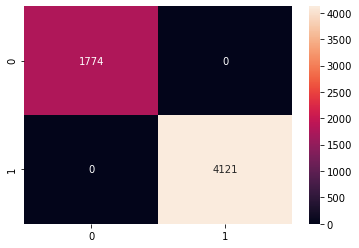

In [249]:
print(accuracy_score(y_train, y_pred_train))
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True,fmt='d')

0.9994913530010173


<AxesSubplot:>

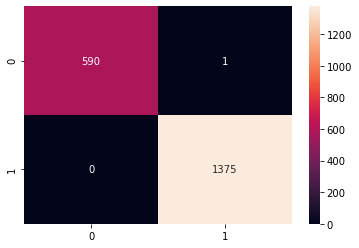

In [250]:
y_pred_test = knn.predict(X_test_scaler)
print(accuracy_score(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True,fmt='d')

In [251]:
X = data.loc[:,['Ia','Ib','Ic','Va','Vb','Vc']]
y = data.target

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=0) #

In [253]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [254]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaler, y_train)

KNeighborsClassifier()

In [255]:
y_pred_train = knn.predict(X_train_scaler)

0.8729431721798134


<AxesSubplot:>

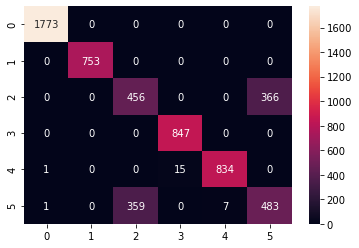

In [256]:
print(accuracy_score(y_train, y_pred_train))
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True,fmt='d')

0.8041709053916581


<AxesSubplot:>

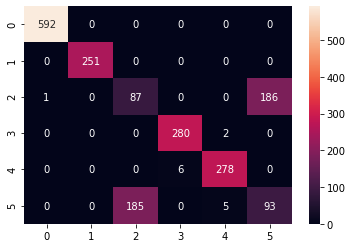

In [257]:
y_pred_test = knn.predict(X_test_scaler)
print(accuracy_score(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True,fmt='d')

In [258]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

In [259]:
folds=StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [260]:
grid = GridSearchCV(knn, param_grid, cv=folds, scoring='accuracy')

In [261]:
grid.fit(X_train_scaler, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [262]:
grid.cv_results_.keys()
pd.DataFrame(grid.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010176,0.000737,0.020349,0.001107,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.869492,0.883051,0.876271,0.879661,0.871186,0.874363,0.867572,0.862479,0.872666,0.891341,0.874808,0.007858,1
1,0.009573,0.000487,0.003493,0.000498,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.869492,0.883051,0.876271,0.879661,0.871186,0.874363,0.867572,0.862479,0.872666,0.891341,0.874808,0.007858,1
2,0.011464,0.001121,0.024543,0.002997,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.835593,0.828814,0.842373,0.832203,0.840678,0.840407,0.845501,0.833616,0.840407,0.842105,0.838170,0.005037,32
3,0.010170,0.000735,0.004288,0.000639,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.869492,0.883051,0.876271,0.879661,0.871186,0.874363,0.867572,0.862479,0.872666,0.891341,0.874808,0.007858,1
4,0.009877,0.001222,0.023437,0.004042,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.808475,0.786441,0.793220,0.784746,0.803390,0.809847,0.796265,0.796265,0.797963,0.814941,0.799155,0.009439,60


In [263]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [264]:
grid.best_score_

0.874808206958073

In [265]:
grid.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [266]:
y_pred_grid = grid.predict(X_test_scaler)

In [267]:
target_names = ['No Falla','Falla entre fase A y fase B','Falla en todas las fases',
                'Falla entre fase A y tierra','Falla entre fase A,B y tierra',
                'Falla entre todas las fases y tierra']
print(classification_report(y_test, y_pred_grid,target_names=target_names))

                                      precision    recall  f1-score   support

                            No Falla       1.00      1.00      1.00       592
         Falla entre fase A y fase B       1.00      1.00      1.00       251
            Falla en todas las fases       0.59      0.58      0.58       274
         Falla entre fase A y tierra       0.98      1.00      0.99       282
       Falla entre fase A,B y tierra       1.00      0.98      0.99       284
Falla entre todas las fases y tierra       0.59      0.61      0.60       283

                            accuracy                           0.88      1966
                           macro avg       0.86      0.86      0.86      1966
                        weighted avg       0.88      0.88      0.88      1966



<AxesSubplot:>

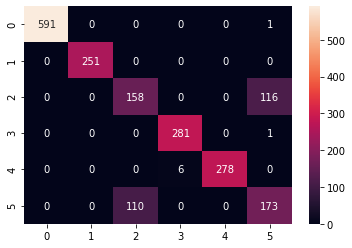

In [268]:
confusion = confusion_matrix(y_test, y_pred_grid)
sns.heatmap(confusion, annot=True,fmt='d')